In [1]:
%pip install ipython
%pip install seaborn
!pip install --upgrade datetime.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'datetime.'


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns
import datetime
import re

# para que salga el grafico
%matplotlib inline

In [3]:
import zipfile

zf=zipfile.ZipFile(r'C:\Users\usuario\Desktop\data-cleaning-sharks-attack\archive.zip')

attack = pd.read_csv(zf.open('attacks.csv'), encoding= "ISO-8859-1", nrows=1e4)

attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
attack.shape

(10000, 24)

In [5]:
attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
attack.Country.value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [7]:
attack.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [8]:
attack.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8701 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [9]:
attack.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,8701,6286,0,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
Type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
num_attack=attack.select_dtypes(include=[np.number])

num_attack.columns.values

array(['Year', 'original order'], dtype=object)

In [11]:
def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña % de valores nulos y la grafica"""
    
    nan_cols = df.isna().mean()  * 100  # porcentaje de nulo en cada columna

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

    sns.heatmap(df.isna(),   # datos
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

'N nan cols: 24'

Case Number               12.99
Date                      36.98
Year                      37.00
Type                      37.02
Country                   37.48
Area                      41.53
Location                  42.38
Activity                  42.42
Name                      39.08
Sex                       42.63
Age                       65.29
Injury                    37.26
Fatal (Y/N)               42.37
Time                      70.52
Species                   65.36
Investigator or Source    37.15
pdf                       36.98
href formula              36.99
href                      36.98
Case Number.1             36.98
Case Number.2             36.98
original order            36.91
Unnamed: 22               99.99
Unnamed: 23               99.98
dtype: float64

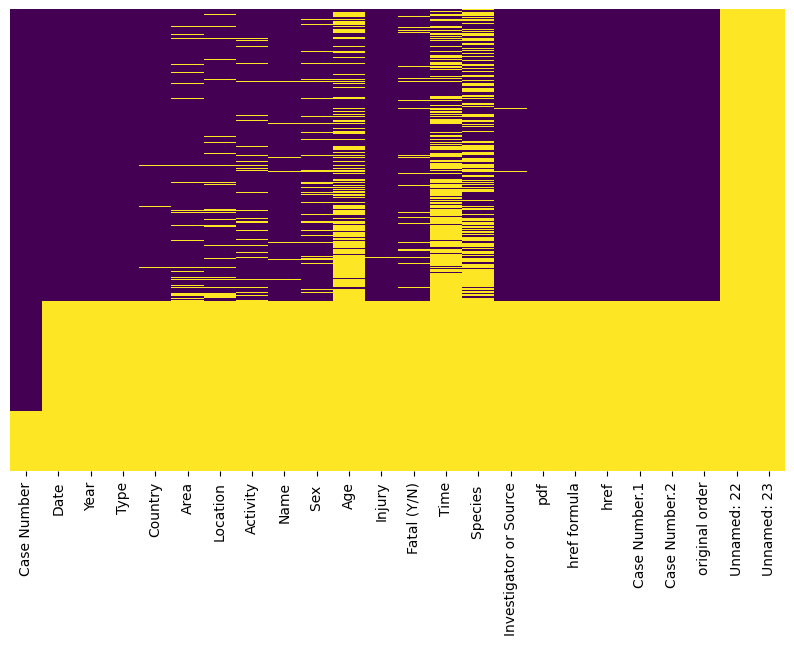

In [12]:
check_nan(attack)

In [13]:
#Analizamos ahora el porcentaje de Nulos para empezar a rellenarlos ya que no podemos eliminar columnas

In [14]:
nan_cols = attack.isna().mean()  * 100  # porcentaje de nulo en cada columna

nan_cols[nan_cols>0]

Case Number               12.99
Date                      36.98
Year                      37.00
Type                      37.02
Country                   37.48
Area                      41.53
Location                  42.38
Activity                  42.42
Name                      39.08
Sex                       42.63
Age                       65.29
Injury                    37.26
Fatal (Y/N)               42.37
Time                      70.52
Species                   65.36
Investigator or Source    37.15
pdf                       36.98
href formula              36.99
href                      36.98
Case Number.1             36.98
Case Number.2             36.98
original order            36.91
Unnamed: 22               99.99
Unnamed: 23               99.98
dtype: float64

In [15]:
#eliminamos las filas finales del archivo que directamente son todas nulas.Es decir a partir del indice 6297 hasta el 10000

In [16]:
attack = attack.drop(attack.index[6297:10000])

In [17]:
attack.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [18]:
"""Hay varias columnas que se podrían rellenar directamente con 'Unkown' pero hay otras que se
correlacionan entre ellas y podrían rellenarse con datos verdaderos"""


"Hay varias columnas que se podrían rellenar directamente con 'Unkown' pero hay otras que se\ncorrelacionan entre ellas y podrían rellenarse con datos verdaderos"

In [19]:
"""Voy a ir columna por columna para saber los valores a los que puedo darles un valor concreto y sino sustituirlas por 'unknown'"""

"Voy a ir columna por columna para saber los valores a los que puedo darles un valor concreto y sino sustituirlas por 'unknown'"

In [20]:
attack['Date'].value_counts()

1957           11
1942            9
1956            8
1950            7
1941            7
               ..
11-Dec-1994     1
13-Dec-1994     1
18-Dec-1994     1
30-Dec-1994     1
07-Nov-1975     1
Name: Date, Length: 5429, dtype: int64

In [21]:
class CleanExcel():

    #Se inicializa la clase
    def __init__(self) -> None:
        pass

    #Se crea una función dentro de la clase para el parseo del csv y limpieza
    def parse_csv(self):
        #Se abre y se establece el encoding en latin-1 para que no de problemas
        attack = pd.read_csv('attacks.csv', encoding='latin-1')

    
        

 


In [22]:
 #Se eliminan aquellos valores que en la columna Date sean Nan
attack = attack.dropna(subset='Date')

In [23]:
 #Mediante un regex se buscan aquellos valores que pueden contener una fecha
attack = attack[attack.Date.str.contains('([0-9]{2}\-([0-9]{2}|[A-Za-z]{3,4})\-[0-9]{4}$)|([0-9]{4}$)', regex=True)]

In [24]:
#Eliminamos los campos que dan problemas de las fechas mediante regex
attack['Date'] = attack.Date.str.replace(r'(Rep.*rt.*d|Early|Summer|Ca\.|[Bb]efore|Circa) ', '')
attack['Date'] = attack.Date.str.replace(r'.* (or|and|&|to|dated|") ', '')
attack['Date'] = attack.Date.str.replace('World War II', '1939-1945')


In [25]:
 #Eliminamos posibles saltos de página encontrados
attack['Investigator or Source'] = attack['Investigator or Source'].str.replace('\\n', ' ')

In [26]:
#Convertimos las fechas a Datetime y las que no sea posible las modifica a NaT con la opción de errors='coerce'
attack['Date'] = pd.to_datetime(attack['Date'], errors='coerce')

In [27]:
attack.to_csv('attacks_clean.csv', sep=';')

In [28]:
#Ahora vamos con la columna Case Number. Que en realidad se trata de un ID, ya que es un dato único. Para ello lo que hacemos es remplazar toda la columna de 1 a n
attack['Case Number'] = [i+1 for i, val in enumerate(attack['Case Number'])]

In [29]:
attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,1,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,3,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,4,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,5,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,6207,1862-01-01,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0,NaN,NaN
6293,6208,1906-01-01,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,NaN,NaN
6294,6209,1906-01-01,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN
6295,6210,1906-01-01,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN


In [30]:
#ahora los valores del año que no contienen info  son ceros, los quiero convertir al año de la columna Date mediante la función .apply
attack['Year'] = attack['Date'].apply(lambda x: x.year)

In [31]:
attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,1,2018-06-25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2,2018-06-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,3,2018-06-09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,4,2018-06-08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,5,2018-06-04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,6207,1862-01-01,1862.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0,NaN,NaN
6293,6208,1906-01-01,1906.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,NaN,NaN
6294,6209,1906-01-01,1906.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN
6295,6210,1906-01-01,1906.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN


In [32]:

attack.info(memory_usage='deep')

#Me doy cuenta que siguen habiendo valores NaN en la columna de año, por lo que los convierto en 'unknown'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6211 entries, 0 to 6296
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6211 non-null   int64         
 1   Date                    6118 non-null   datetime64[ns]
 2   Year                    6118 non-null   float64       
 3   Type                    6207 non-null   object        
 4   Country                 6163 non-null   object        
 5   Area                    5769 non-null   object        
 6   Location                5689 non-null   object        
 7   Activity                5680 non-null   object        
 8   Name                    6008 non-null   object        
 9   Sex                     5653 non-null   object        
 10  Age                     3447 non-null   object        
 11  Injury                  6183 non-null   object        
 12  Fatal (Y/N)             5681 non-null   object  

In [33]:
""" veo que los valores nulos de la columna Date y Year son los mismo y el número es pequeño por lo que los puedo eliminar"""
attack.dropna(subset=['Year'], inplace=True)

In [34]:
attack.shape

(6118, 24)

In [35]:
 #ahora puedo convertir los años a enteros
attack['Year'] = attack['Year'].astype(int)

In [37]:
""" Ahora me fijo en otras columnas que puedan estar relacionadas entre ellas, por ejemplo 'Area' y 'Location' y 'Country'"""


" Ahora me fijo en otras columnas que puedan estar relacionadas entre ellas, por ejemplo 'Area' y 'Location' y 'Country'"

In [38]:
#En las columnas que tienen un bajo porcentaje de valores nulos directamente los convierto a 'Unknown' para poder trabajar con ellos.
#por ejemplo la columna 'Country' tiene un porcentaje muy bajo y la necesito para poder trabajar las columnas 'Area' y 'Location'
""" Ahora voy a rellenar la columna Area a traves de la columna  Country, po lo que necesito que los valores Nulos se conviertan en 'Unknown'
Después calculo la moda de los valores de Area en Country,mediante .gropuby y generando un diccionario puedo 
rellenar los valores de Área con la moda de los valores únicos de country.

In [39]:
attack['Country'].fillna('Unknown', inplace=True)

In [40]:
attack['Country'] = attack['Country'].astype(str)

In [41]:
attack['Area'].fillna('Unknown', inplace=True)

In [42]:
moda_por_pais = attack.groupby('Country')['Area'].apply(lambda x: x.value_counts().idxmax())
moda_por_pais_dict = moda_por_pais.to_dict()

attack['Area'] = attack.apply(lambda row: moda_por_pais_dict[row['Country']] if row['Area'] == 'Unknown' else row['Area'], axis=1)

In [44]:
attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,1,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,3,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,4,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,5,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,6207,1862-01-01,1862,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0,NaN,NaN
6293,6208,1906-01-01,1906,Unprovoked,AUSTRALIA,New South Wales,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,NaN,NaN
6294,6209,1906-01-01,1906,Unprovoked,AUSTRALIA,New South Wales,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN
6295,6210,1906-01-01,1906,Unprovoked,AUSTRALIA,New South Wales,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN


In [ ]:
moda_por_pais = attack.groupby('Country')['Area'].apply(lambda x: x.value_counts().idxmax())
moda_por_pais_dict = moda_por_pais.to_dict()

attack['Area'] = attack.apply(lambda row: moda_por_pais_dict[row['Country']] if row['Area'] == 'Unknown' else row['Area'], axis=1)

In [45]:
nan_cols = attack.isna().mean()  * 100  # porcentaje de nulo en cada columna

nan_cols[nan_cols>0]

Type                       0.065381
Location                   8.221641
Activity                   8.385093
Name                       3.285387
Sex                        8.940830
Age                       43.870546
Injury                     0.375940
Fatal (Y/N)                8.564890
Time                      52.239294
Species                   44.606080
Investigator or Source     0.277869
href formula               0.016345
Unnamed: 22               99.983655
Unnamed: 23               99.967310
dtype: float64

'New South Wales'